# Fast Fourier Transform for Solving Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = lambda x, y: np.sin(2*np.pi*x)*np.sin(2*np.pi*y)

In [3]:
n = 32
x = np.linspace(0, 1-1/n, n)
y = np.linspace(0, 1-1/n, n)
xv, yv = np.meshgrid(x, y)

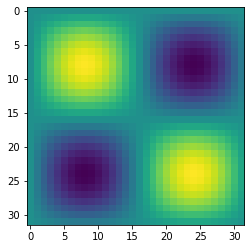

In [4]:
plt.imshow(g(xv,yv))

In [5]:
b = g(xv,yv)

In [6]:
B = np.fft.fft2(b)

Text(0.5, 1.0, 'imag part of X')

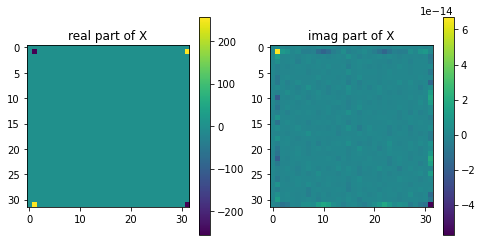

In [7]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.imshow(np.real(B))
plt.colorbar()
plt.title('real part of X')
plt.subplot(1,2,2)
plt.imshow(np.imag(B))
plt.colorbar()
plt.title('imag part of X')

In [8]:
def plot_fft_for_sin(k,l,n): # k and l are the wave frequency in x and y direction
    x = np.linspace(0, 1-1/n, n)
    y = np.linspace(0, 1-1/n, n)
    xv, yv = np.meshgrid(x, y)
    g = lambda x, y: np.sin(2*np.pi*k*x)*np.sin(2*np.pi*l*y)
    b = g(xv, yv)
    B = np.fft.fft2(b)
    plt.figure(figsize=[8,2.5])
    plt.subplot(1,3,1)
    plt.imshow(b)
    plt.colorbar()
    plt.title('the function b')
    plt.subplot(1,3,2)
    plt.imshow(np.real(B))
    plt.colorbar()
    plt.title('real part of B')
    plt.subplot(1,3,3)
    plt.imshow(np.imag(B))
    plt.colorbar()
    plt.title('imag part of B')

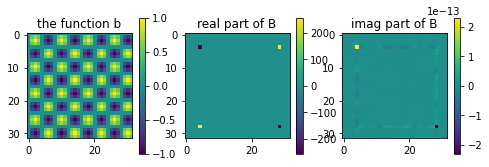

In [9]:
plot_fft_for_sin(4,4,32)

Previously we use $X_k$ to denote Fourier Coefficients. But it's too completed, because if we change the function name to $b$, or if we have $x$ and $y$ as spatial parameters, it's not convenient to denote the Fourier Coefficient. Let's use hat for Fourier Coefficients:
$$\hat{x}_k=\sum_{n=0}^{N-1}x_ne^{-2\pi i kn/N}$$

In 2D, we do the same thing:
$$\hat{f}_{k,l}=\sum_{n=0}^{N-1}\sum_{m=0}^{M-1}f_{n,m}e^{-2\pi i kn/N}e^{-2\pi i km/M}$$

### Fourier Coefficient of Derivatives of a function

<div style="background-color:rgba(0, 256, 0, 0.2); padding:10px 0;font-family:monospace;">
Q: If $f(x)$ is a periodic function with $x\in[0,1]$, and we use $f_n=f(n/N)$ to discretize this function $f$, what is the Fourier Coefficient of $f'(x)$?
</div>

Here's the answer for this:<br/>
The Inverse Fourier Transform says:
$$f(n/N) = \dfrac{1}{N}\sum_{k=0}^{N-1}\hat{f}_ke^{2\pi i kn/N}$$
If you take $x_n=n/N$, then 
$$f(x_n) = \dfrac{1}{N}\sum_{k=0}^{N-1}\hat{f}_ke^{2\pi i kx_n}$$
So then, 
$$f'(x_n) = \dfrac{1}{N}\sum_{k=0}^{N-1}(2\pi i k)\hat{f}_ke^{2\pi i kx_n}$$
Now, because the $f'$ can also be written as 
$$f'(x_n) = \dfrac{1}{N}\sum_{k=0}^{N-1}\hat{f'}_ke^{2\pi i kx_n}$$
So, 
$$\hat{f'}_k = (2\pi i k)\hat{f}_k$$

<div style="background-color:rgba(0, 256, 0, 0.2); padding:10px 0;font-family:monospace;">
    Q: If $f(x)$ is a periodic function with $x\in[0,1]$, and we use $f_n=f(n/N)$ to discretize this function $f$, what is the Fourier Coefficient of $f''(x)$?
</div>

$$\hat{f''}_k = (2\pi i k)^2\hat{f}_k = -4(\pi k)^2\hat{f}_k$$

### Using Fourier Transform to solve differential equations


<div style="background-color:rgba(0, 256, 0, 0.2); padding:10px 0;font-family:monospace;">
Consider this equation $$u-u_{xx}-u_{yy} = b(x,y)$$
with $$b(x,y)=\sin(2\pi x)\sin(2\pi y)$$
also with $u$ being a periodic function over the domain $(x,y)\in[0,1]\times[0,1]$
    </div>

Assume that $u(x,y)=c\cdot b(x,y)$, 
then $$u_{xx} = u_{yy} = -4\pi^2 c\cdot b(x,y)$$
Then, we have 
$$u-u_{xx}-u_{yy} = c\cdot b(x,y)+4\pi^2 c\cdot b(x,y)+4\pi^2 c\cdot b(x,y) = (1+8\pi^2)c\cdot b(x,y)$$
On the other hand, we have $$u-u_{xx}-u_{yy} = b(x,y)$$
So $$(1+8\pi^2)c\cdot b(x,y)= b(x,y)$$
So $$c = \dfrac{1}{1+8\pi^2}$$
and $$u(x,y) = \dfrac{1}{1+8\pi^2}\sin(2\pi x)\sin(2\pi y)$$

<div style="background-color:rgba(0, 256, 0, 0.2); padding:10px 0;font-family:monospace;">
Homework: Consider another equation $$u-u_{xx}-u_{yy} = b(x,y)$$
with $$b(x,y)=\sin(2\pi kx)\sin(2\pi ly)$$
also with $u$ being a periodic function over the domain $(x,y)\in[0,1]\times[0,1]$<br/>
    Find the solution $u(x,y)$. 
    </div>

Solution: $$u(x,y)=\dfrac{1}{1+4\pi^2k^2+4\pi^2l^2}\sin(2\pi kx)\sin(2\pi ly)$$

$$\sin(2\pi kx)=\dfrac{e^{2\pi kxi}-e^{-2\pi kxi}}{2i}$$
\begin{align}
&\sin(2\pi kx)\sin(2\pi ly)=\dfrac{e^{2\pi kxi}-e^{-2\pi kxi}}{2i}\dfrac{e^{2\pi lyi}-e^{-2\pi lyi}}{2i}\\
=&-0.25e^{2\pi kxi}e^{2\pi lyi}+0.25e^{-2\pi kxi}e^{2\pi lyi}+0.25e^{2\pi kxi}e^{-2\pi lyi}-0.25e^{-2\pi kxi}e^{-2\pi lyi}
\end{align}

<div style="background-color:rgba(0, 256, 0, 0.2); padding:10px 0;font-family:monospace;">
Homework: Consider another equation $$u-u_{xx}-u_{yy} = b(x,y)$$
also with $u$ being a periodic function over the domain $(x,y)\in[0,1]\times[0,1]$<br/>
    Find the solution $u(x,y)$. 
    </div>

Apply FFT on both sides of the equation, we get:
$$\widehat{u-u_{xx}-u_{yy}}=\widehat{b(x,y)}$$
So, 
$$\hat{u}_{k,l}+4\pi^2 k^2\hat{u}_{k,l}+4\pi^2 l^2\hat{u}_{k,l} = \hat{b}_{k,l}$$
Hence, $$\hat{u}_{k,l} = \dfrac{1}{1+4\pi^2 k^2+4\pi^2l^2}\hat{b}_{k,l}$$


<div style="background-color:rgba( 256, 0, 0, 0.2); padding:10px 0;font-family:monospace;">
    
This whole process of solving PDEs using FFT can be summarized as the following:
1. FFT2D $b(x,y)\rightarrow \hat{b}_{k,l}$, transforms $b$ from physical domain to frequency domain. 
2. FFTSHIFT: changing the frequency domain from $[0, N)^2$ to $[-N/2,N/2)^2$.
3. Create a matrix $K$, with $K_{k,l} = \dfrac{1}{1+4\pi^2k^2+4\pi^2l^2}$
4. Multiply the matrix $K$ with the matrix of shifted Fourier coefficients $\hat{b}$. 
5. IFFTSHIFT on $K\hat{b}$
6. IFFT2D on the output from step 5. That gives us the solution $u(x,y)$
</div>

In [20]:
def solvePDE(b):
    n = b.shape[0]
    B = np.fft.fft2(b)
    B = np.fft.fftshift(B)
    k = np.arange(-n/2,n/2)
    l = np.reshape(k,(n,1))
    K = 1/(1+4*np.pi*np.pi*(k**2+l**2))
    U = K*B
    U = np.fft.ifftshift(U)
    u = np.fft.ifft2(U)
    return u

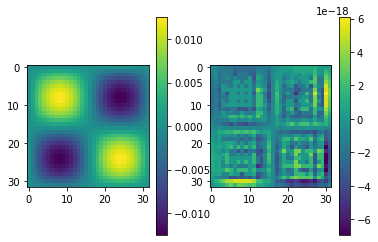

In [24]:
u = solvePDE(b)
plt.subplot(1,2,1)
plt.imshow(np.real(u))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.real(u)-b/(1+8*np.pi*np.pi))
plt.colorbar()

In [29]:
m, n = b.shape
b = (np.random.rand(m,n)-0.5)*10

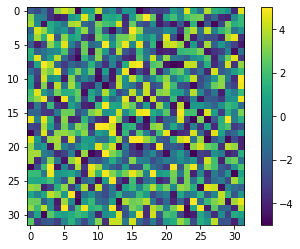

In [30]:
plt.imshow(b)
plt.colorbar()

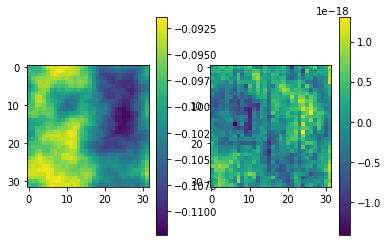

In [31]:
u = solvePDE(b)
plt.subplot(1,2,1)
plt.imshow(np.real(u))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.imag(u))
plt.colorbar()